In [1]:
import numpy as np # linear algebra
import pandas as pd # Data ETL, csv file I/O
import matplotlib.pyplot as plt # MATLAB like plotting framework
import seaborn as sns # statistical data vizualization library based on matplotlib
import sklearn.cluster as cluster
import multiprocessing as mp
import polyline
import time

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

%matplotlib inline

In [2]:
small_df = pd.read_csv("../data/activities_small.csv", parse_dates=["start_date", "start_date_local"])

In [3]:
df = small_df[small_df['commute'] == 0] # drop all where commute = true and store as new dataframe, df
df = df[df['state'] == 'Colorado'] # drop all where state != Colorado
df = df[df['type'] == 'Ride'] # drop everything that is not of type 'Ride' for now
df.dropna(subset=['map_summary_polyline'], inplace=True) # drop all where map_summary_polyline is nan

In [4]:
data = df[['start_lat', 'start_lng']].values

In [5]:
data[:5]

array([[  39.69, -105.15],
       [  39.17, -108.83],
       [  39.98, -105.24],
       [  39.31, -108.71],
       [  40.04, -105.26]])

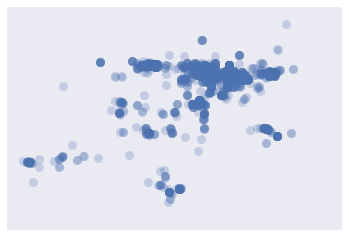

In [6]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [7]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
#     plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
#     plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

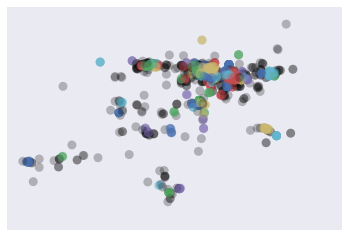

In [8]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.022})

In [9]:
import hdbscan

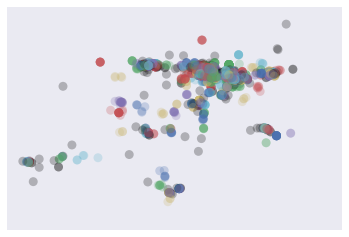

In [10]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':2})

In [11]:
data.shape

(5577, 2)

In [12]:
algorithm = hdbscan.HDBSCAN(min_cluster_size=2)
start_time = time.time()
labels = algorithm.fit_predict(data)
end_time = time.time()

In [13]:
print("run time: {} seconds".format(end_time - start_time))

run time: 0.178170919418 seconds


In [14]:
len(np.unique(labels))

473

In [15]:
df['label_index'] = labels

In [16]:
df_gb = df[['name','label_index']].groupby(['label_index'])['name'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)

In [17]:
df_gb

,label_index,count
0,-1,236
379,378,220
238,237,109
354,353,107
309,308,99


In [18]:
df.loc[df['label_index'] == -1, ['name','start_lat', 'start_lng']]

,name,start_lat,start_lng
10,Afternoon Ride,39.98,-105.07
16,Colorado Trail Segment 1,39.40,-105.17
114,Fall colors with Lexie and Spoj,38.89,-107.00
257,Jamestown & Bow Mountain,40.07,-105.29
279,Afternoon Ride,39.86,-105.05
382,"09/25/2014 Boulder, Colorado",40.07,-105.26
386,Morning Ride,39.22,-108.88
410,Afternoon Ride,40.47,-106.83
442,Afternoon Ride,40.54,-106.93
449,Mountain biking!,39.93,-105.24


In [19]:
b = np.ascontiguousarray(data).view(np.dtype((np.void, data.dtype.itemsize * data.shape[1])))
_, idx = np.unique(b, return_index=True)

unique_data = data[idx]

In [20]:
unique_data.shape

(962, 2)

In [21]:
large_df = pd.read_csv("../data/activities_large.csv", parse_dates=["start_date", "start_date_local"])

In [22]:
l_df = large_df[large_df['commute'] == 0] # drop all where commute = true and store as new dataframe, df
l_df = l_df[l_df['state'] == 'Colorado'] # drop all where state != Colorado
l_df = l_df[l_df['type'] == 'Ride'] # drop everything that is not of type 'Ride' for now
l_df.dropna(subset=['map_summary_polyline'], inplace=True) # drop all where map_summary_polyline is nan

In [23]:
l_data = l_df[['start_lat', 'start_lng']].values

In [24]:
l_data.shape

(57169, 2)

In [25]:
c = np.ascontiguousarray(l_data).view(np.dtype((np.void, l_data.dtype.itemsize * l_data.shape[1])))
_, idx = np.unique(c, return_index=True)

unique_data = l_data[idx]

In [26]:
unique_data.shape

(3109, 2)

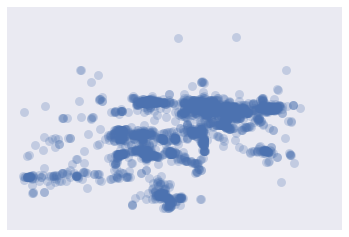

In [27]:
plt.scatter(unique_data.T[0], unique_data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [28]:
algorithm = hdbscan.HDBSCAN(min_cluster_size=2)
start_time = time.time()
labels = algorithm.fit_predict(l_data)
end_time = time.time()

In [29]:
print("run time: {} seconds".format(end_time - start_time))

run time: 2.29845094681 seconds


In [30]:
len(np.unique(labels))

1743

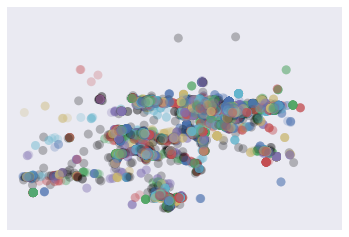

In [31]:
plot_clusters(l_data, hdbscan.HDBSCAN, (), {'min_cluster_size':2})

In [32]:
l_df['label_index'] = labels

In [33]:
df_gb = l_df[['name','label_index']].groupby(['label_index'])['name'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)

In [34]:
df_gb

,label_index,count
1501,1500,1436
880,879,1150
738,737,803
1547,1546,802
0,-1,710


In [35]:
l_df.loc[l_df['label_index'] == 4, ['name','start_lat', 'start_lng']].head(20)

,name,start_lat,start_lng
27810,"07/04/2015 Fort Garland, Colorado",37.23,-105.27
53434,Cuchara Pass up and back,37.51,-105.01
95631,"Stonewall Century La Veta,CO",37.51,-105.01


In [36]:
size = np.max(labels)

In [37]:
variance = np.zeros(shape=(size, 2))
for i in xrange(size):
    lmask = l_df['label_index'] == i
    arr = l_df.loc[lmask, ['start_lat', 'start_lng']].values
    variance[i] = np.var(arr, 0)

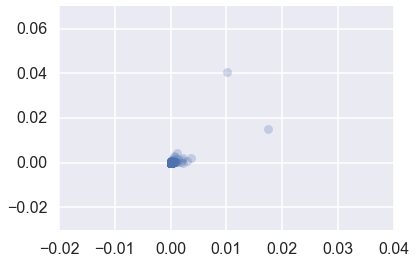

In [38]:
plt.scatter(variance.T[0], variance.T[1], c='b', **plot_kwds)

In [39]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create traces
trace0 = go.Scatter(
    x = range(size),
    y = variance.T[0],
    mode = 'lines',
    name = 'cluster variance longitude'
)
trace1 = go.Scatter(
    x = range(size),
    y = variance.T[1],
    mode = 'lines',
    name = 'cluster variance latitude'
)
trace2 = go.Scatter(
    x = range(size),
    y = np.sqrt(variance.T[0] ** 2 + variance.T[1] ** 2),
    mode = 'lines',
    name = 'cluster variance combined'
)
data = [trace0, trace1, trace2]

py.iplot(data, filename='line-mode')

2 and 4 have the worst cluster variance but looking at the clusters it shouldn't provide too bad of clusters

In [40]:
from collections import defaultdict

def get_key_to_indexes_ddict(labels):
    indexes = defaultdict(list)
    for index, label in enumerate(labels):
        indexes[label].append(index)
    return indexes

mapper = get_key_to_indexes_ddict(labels)

In [41]:
mapper

defaultdict(list,
            {0: [8878, 13763, 42847],
             1: [2697, 6680, 40940],
             2: [14611, 31362, 33522, 49821],
             3: [6305, 7858, 56764],
             4: [15205, 29204, 51823],
             5: [6740, 12109],
             6: [16315, 57038, 57039],
             7: [4173, 28105, 28184, 29036, 35542, 40715],
             8: [5163, 37485, 42708],
             9: [12640, 25817],
             10: [24125, 36278, 40470, 44143, 47887],
             11: [42273, 46810, 47401, 52951, 55434],
             12: [23581, 27479, 27480, 27483, 42397],
             13: [8239, 15264, 18553, 34664, 47407],
             14: [11259,
              11815,
              24486,
              28892,
              29512,
              31465,
              41559,
              43923,
              50883],
             15: [15763, 16090, 27484, 28662],
             16: [2473, 45026, 45063, 54739],
             17: [10391, 15509, 33618, 36723, 36784, 43004],
             18: [13704

In [42]:
# for k, v in mapper.iteritems():
k = 17
v = [10391, 15509, 33618, 36723, 36784, 43004] # sample clump
X = l_df.iloc[v, [36, 37]]
lats = X.end_lat.values # array of end latitudes
lngs = X.end_lng.values # array of end longitudes

In [43]:
zip(lats, lngs)

[(38.130000000000003, -105.52),
 (37.990000000000002, -105.47),
 (38.140000000000001, -105.47),
 (38.130000000000003, -105.52),
 (38.130000000000003, -105.52),
 (38.140000000000001, -105.47)]

In [44]:
#block of code to time here
dsts = [] # empty distance array
# populate distance array
for (lt, lg) in zip(lats, lngs):
    dsts.append(np.sqrt((lats - lt)**2 + (lngs - lg)**2))
dsts = np.array(dsts) # convert to numpy array
il1 = np.tril_indices(dsts.shape[0]) # lower triangle mask
dsts[il1] = -1

pairs = np.argwhere((dsts <= 0.01) & (dsts > -1))

In [45]:
idxs = np.array(sorted(set(pairs.flatten()))) # indices of v with the most similar endpoints

In [46]:
new_v = np.array(v)[idxs]
X = l_df.iloc[new_v, [33]]
maps = X.map_summary_polyline.values # array of polylines

In [47]:
def polytrim(poly1, poly2):
    diff = len(poly1) - len(poly2)
    rands = np.random.choice(np.arange(0, len(poly1)-2, 2), diff/2, replace=False)
    return np.delete(poly1, np.hstack((rands,rands+1)))

In [48]:
def conditional_dist(poly1, poly2):
    poly1 = np.array(polyline.decode(poly1)).flatten()
    poly2 = np.array(polyline.decode(poly2)).flatten()
    if len(poly1) > len(poly2):
        poly1 = polytrim(poly1, poly2)
    elif len(poly1) < len(poly2):
        poly2 = polytrim(poly2, poly1)
    return np.linalg.norm(np.subtract(poly1, poly2)) # return distance between polylines

vfunc = np.vectorize(conditional_dist)

In [49]:
#block of code to time here
dsts = [] # empty distance array
# populate distance array
for poly in maps:
    dsts.append(vfunc(poly, maps))
dsts = np.array(dsts) # convert to numpy array
il1 = np.tril_indices(dsts.shape[0]) # lower triangle mask
dsts[il1] = -1

pairs = np.argwhere((dsts <= 1.0) & (dsts is not None) & (dsts > -1))

In [50]:
idxs = np.array(sorted(set(pairs.flatten()))) # indices of v with the most similar polylines

In [51]:
final_v = np.array(v)[idxs]
rem = np.setdiff1d(v, final_v)

In [52]:
# create a smaller version of mapper with the first 100 keys
copy_mapper = {}
for k in range(100):
    copy_mapper[k] = mapper[k]
copy_mapper[-1] = mapper[-1]

In [53]:
start = time.time()
for k, v in copy_mapper.iteritems():
    if k == -1:
        continue
    X = l_df.iloc[v, [36, 37]] # Dataframe object with lats and longs
    lats = X.end_lat.values # array of end latitudes
    lngs = X.end_lng.values # array of end longitudes

    dsts = [] # empty distance array
    # populate distance array with dists between end lats and longs
    for (lt, lg) in zip(lats, lngs):
        dsts.append(np.sqrt((lats - lt)**2 + (lngs - lg)**2))
    dsts = np.array(dsts) # convert to numpy array
    il1 = np.tril_indices(dsts.shape[0]) # lower triangle mask
    dsts[il1] = -1

    pairs = np.argwhere((dsts <= 0.01) & (dsts > -1))
    idxs = np.array(sorted(set(pairs.flatten()))) # indices of v with the most similar endpoints
    if idxs.size != 0:
        new_v = np.array(v)[idxs]
        X = l_df.iloc[new_v, [33]] # Series object with map summary polyines
        maps = X.map_summary_polyline.values # array of polylines

        dsts = [] # empty distance array
        # populate distance array
        for poly in maps:
            dsts.append(vfunc(poly, maps))
        dsts = np.array(dsts) # convert to numpy array
        il1 = np.tril_indices(dsts.shape[0]) # lower triangle mask
        dsts[il1] = -1

        pairs = np.argwhere((dsts <= 1.0) & (dsts is not None) & (dsts > -1))
        idxs = np.array(sorted(set(pairs.flatten()))) # indices of v with the most similar polylines
        if idxs.size != 0:
            final_v = np.array(new_v)[idxs]
            copy_mapper[-1].extend(list(np.setdiff1d(v, final_v)))
            copy_mapper[k] = list(final_v)
    else:
        copy_mapper[-1].extend(v[1:])
        copy_mapper[k] = [v[0]]

end = time.time()
print('The function ran for', end - start)

('The function ran for', 29.81885600090027)


In [54]:
def clusterize_by_polyline(chunk):
    copy_mapper = dict(item for item in chunk)  # Convert back to a dict
    copy_mapper[-1] = [] # initial empty list value for key = -1
    for k, v in copy_mapper.iteritems():
        if k == -1:
            continue
        X = l_df.iloc[v, [36, 37]] # Dataframe object with lats and longs
        lats = X.end_lat.values # array of end latitudes
        lngs = X.end_lng.values # array of end longitudes

        dsts = [] # empty distance array
        # populate distance array with dists between end lats and longs
        for (lt, lg) in zip(lats, lngs):
            dsts.append(np.sqrt((lats - lt)**2 + (lngs - lg)**2))
        dsts = np.array(dsts) # convert to numpy array
        il1 = np.tril_indices(dsts.shape[0]) # lower triangle mask
        dsts[il1] = -1

        pairs = np.argwhere((dsts <= 0.01) & (dsts > -1))
        idxs = np.array(sorted(set(pairs.flatten()))) # indices of v with the most similar endpoints
        if idxs.size != 0:
            new_v = np.array(v)[idxs]
            X = l_df.iloc[new_v, [33]] # Series object with map summary polyines
            maps = X.map_summary_polyline.values # array of polylines

            dsts = [] # empty distance array
            # populate distance array
            for poly in maps:
                dsts.append(vfunc(poly, maps))
            dsts = np.array(dsts) # convert to numpy array
            il1 = np.tril_indices(dsts.shape[0]) # lower triangle mask
            dsts[il1] = -1

            pairs = np.argwhere((dsts <= 1.0) & (dsts is not None) & (dsts > -1))
            idxs = np.array(sorted(set(pairs.flatten()))) # indices of v with the most similar polylines
            if idxs.size != 0:
                final_v = np.array(new_v)[idxs]
                copy_mapper[-1].extend(list(np.setdiff1d(v, final_v)))
                copy_mapper[k] = list(final_v)
        else:
            copy_mapper[-1].extend(v[1:])
            copy_mapper[k] = [v[0]]
    return copy_mapper

In [55]:
# copy the mapper again
copy_mapper = {}
for k in range(100):
    copy_mapper[k] = mapper[k]

In [56]:
start = time.time()

# Break the output dict into 4 lists of (key, value) pairs
items = list(copy_mapper.iteritems())
chunksize = 4
chunks = [items[i:i + chunksize ] for i in range(0, len(items), chunksize)]
pool = mp.Pool(processes=4)
results = [pool.apply_async(clusterize_by_polyline, args=(x,)) for x in chunks]
output = [p.get() for p in results]

end = time.time()


In [57]:
print('The function ran for', end - start)

('The function ran for', 22.6096088886261)
